In [1]:
import numpy as np
from scipy import linalg

import sys
sys.path.append("..")
import create_data
import os
os.chdir("..")

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dat = np.random.normal(0,1,size=(100,50))

In [11]:
U, s, Vh = linalg.svd(dat, full_matrices=False)
print U.shape, Vh.shape, s.shape
S = linalg.diagsvd(s, 50, 50)
np.allclose(dat, np.dot(U, np.dot(S, Vh)))

(100, 50) (50, 50) (50,)


True

---

In [3]:
X_train, X_valid, X_test = create_data.load_movielens10m_matrix_new()

X_train =  (71567, 65133)
X_valid =  (71567, 65133)
X_test =  (71567, 65133)


In [7]:
X_train_dense = X_train.astype("float32").todense()

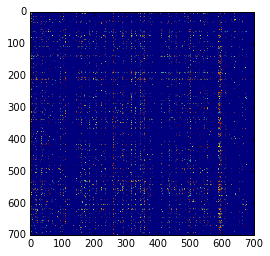

In [17]:
plt.imshow(X_train_dense[0:700,0:700])

In [19]:
np.mean(X_train_dense[0:10,], axis=1)

matrix([[ 0.00115149],
        [ 0.00076766],
        [ 0.00181935],
        [ 0.00184238],
        [ 0.00393042],
        [ 0.00196521],
        [ 0.00501282],
        [ 0.03278676],
        [ 0.00106705],
        [ 0.00594169]], dtype=float32)

In [20]:
np.nonzero(X_train_dense[0:10,])

(array([0, 0, 0, ..., 9, 9, 9]),
 array([ 291,  315,  355, ..., 2986, 3066, 3067]))

In [21]:
row_means = []
for i in range(0, X_train_dense.shape[0]):
    row = X_train_dense[i]
    row_mean = np.sum(row) / ((row != 0).sum()+1)
    row = row - row_mean
    X_train_dense[i] = row
    row_means.append(row_mean)

In [37]:
U, s, Vh = linalg.svd(X_train_dense, full_matrices=False, check_finite=False)

ValueError: Too large work array required -- computation cannot be performed with standard 32-bit LAPACK.

In [38]:
X_train_dense

matrix([[-4.6875    , -4.6875    , -4.6875    , ..., -4.6875    ,
         -4.6875    , -4.6875    ],
        [-3.125     , -3.125     , -3.125     , ..., -3.125     ,
         -3.125     , -3.125     ],
        [-3.82258058, -3.82258058, -3.82258058, ..., -3.82258058,
         -3.82258058, -3.82258058],
        ..., 
        [-3.86178851, -3.86178851, -3.86178851, ..., -3.86178851,
         -3.86178851, -3.86178851],
        [ 1.28571439, -3.71428561, -3.71428561, ..., -3.71428561,
         -3.71428561, -3.71428561],
        [-3.15555549, -3.15555549, -3.15555549, ..., -3.15555549,
         -3.15555549, -3.15555549]], dtype=float32)